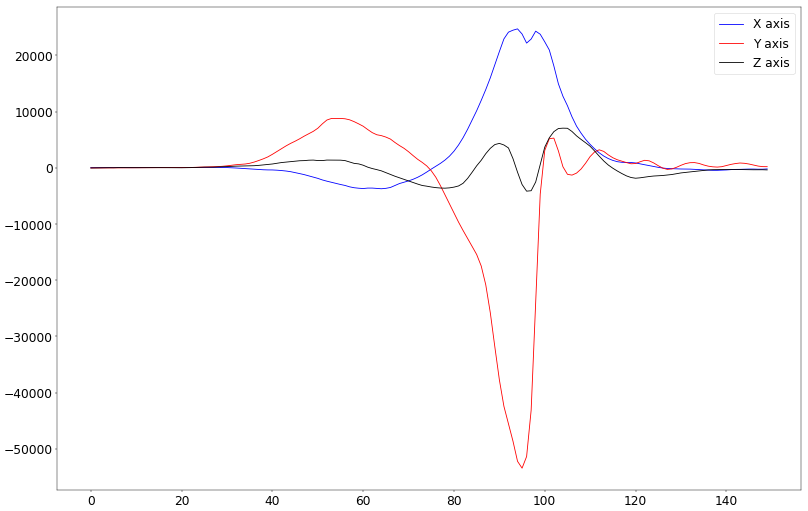

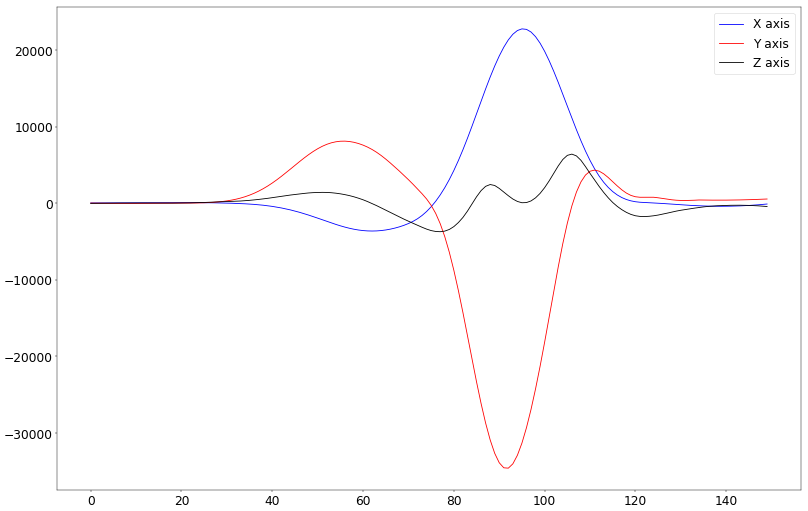

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

col_names = ['timestamp', 'X', 'Y', 'Z']
gyro_data_reference = pd.read_csv('./reference-fd-bw/gyro.csv', names=col_names)

TMP_START = 0
TMP_END = 150

font = {
    # 'weight': 'bold',
    'size': 22
}
import matplotlib
matplotlib.rc('font', **font)
matplotlib.rcParams.update({'font.size': 22})

xaxis = list(range(len(gyro_data_reference)))[TMP_START:TMP_END]
x_reference = gyro_data_reference['X'][TMP_START:TMP_END]
# x_alt = savitzky_golay(list(x_reference), 31, 2)
y_reference = gyro_data_reference['Y'][TMP_START:TMP_END]
z_reference = gyro_data_reference['Z'][TMP_START:TMP_END]
fig1 = plt.figure(figsize=(24, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(x_reference), color="blue", label="X axis")
plt.plot(xaxis, np.rad2deg(y_reference), color="red", label="Y axis")
plt.plot(xaxis, np.rad2deg(z_reference), color="black", label="Z axis")
# plt.yaxis.label.set_size(40)
plt.legend()
plt.show()


# reference data filtration
x_reference = savgol_filter(list(x_reference), 21, 2)
x_reference = savgol_filter(list(x_reference), 31, 2)
y_reference = savgol_filter(list(y_reference), 21, 2)
y_reference = savgol_filter(list(y_reference), 31, 2)
# z_reference = savitzky_golay(list(z_reference), 11, 2)
z_reference = savgol_filter(list(z_reference), 21, 2)

fig2 = plt.figure(figsize=(24, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(x_reference), color="blue", label="X axis")
plt.plot(xaxis, np.rad2deg(y_reference), color="red", label="Y axis")
plt.plot(xaxis, np.rad2deg(z_reference), color="black", label="Z axis")
plt.legend()
plt.show()



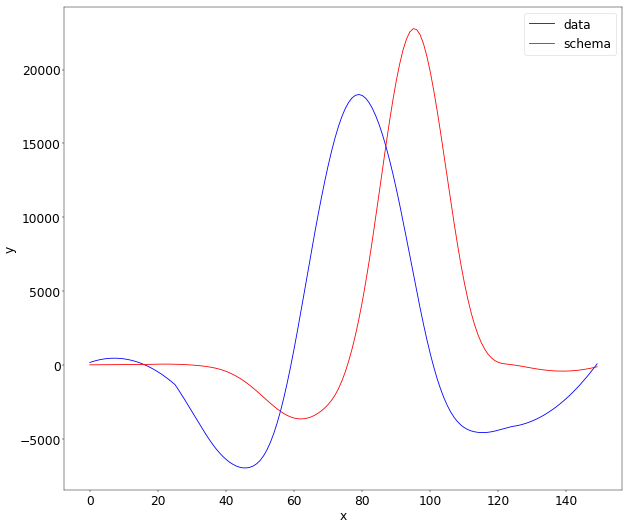

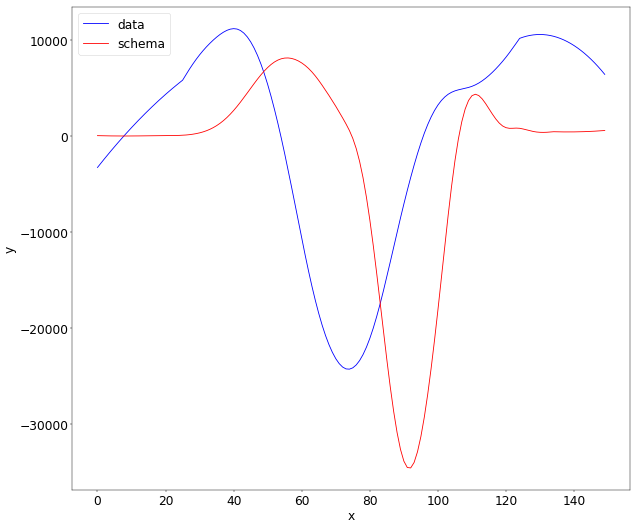

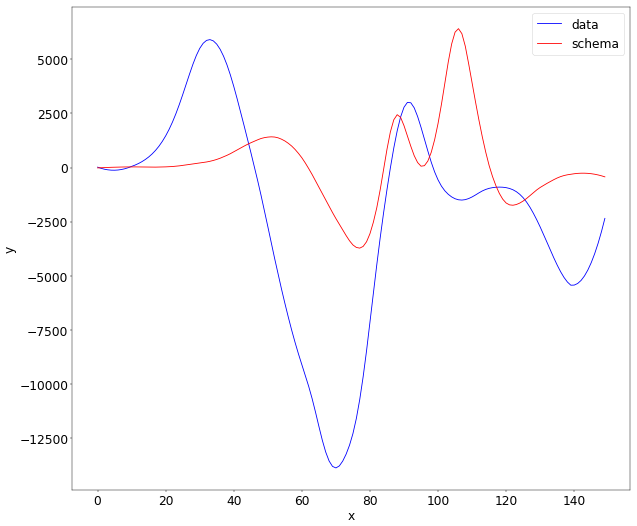

In [26]:

TMP_START = 0
TMP_END = 150

gyro_data_forward = pd.read_csv('./amg-forward/gyro.csv', names=col_names)
xaxis = list(range(len(gyro_data_forward)))[TMP_START:TMP_END]

x_normal = gyro_data_forward['X'][TMP_START:TMP_END]
y_normal = gyro_data_forward['Y'][TMP_START:TMP_END]
z_normal = gyro_data_forward['Z'][TMP_START:TMP_END]

# forward data normalization
x_normal = savgol_filter(list(x_normal), 21, 2)
x_normal = savgol_filter(list(x_normal), 51, 2)
y_normal = savgol_filter(list(y_normal), 31, 2)
y_normal = savgol_filter(list(y_normal), 51, 2)
z_normal = savgol_filter(list(z_normal), 11, 2)
z_normal = savgol_filter(list(z_normal), 21, 2)


fig = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(x_normal), color="blue", label="data")
plt.plot(xaxis, np.rad2deg(x_reference), color="red", label="schema")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
fig2 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(y_normal), color="blue", label="data")
plt.plot(xaxis, np.rad2deg(y_reference), color="red", label="schema")
# plt.plot(xaxis, np.rad2deg(z_normal), color="black", label="zaxis")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
fig3 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(z_normal), color="blue", label="data")
plt.plot(xaxis, np.rad2deg(z_reference), color="red", label="schema")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [19]:
%pylab inline
from dtw import dtw
# DTW for Z acc
x_normal = gyro_data_forward['X']
y_normal = gyro_data_forward['Y']
z_normal = gyro_data_forward['Z']

# forward data normalization
x_normal = savgol_filter(list(x_normal), 21, 2)
x_normal = savgol_filter(list(x_normal), 51, 2)
y_normal = savgol_filter(list(y_normal), 31, 2)
y_normal = savgol_filter(list(y_normal), 51, 2)
z_normal = savgol_filter(list(z_normal), 11, 2)
z_normal = savgol_filter(list(z_normal), 21, 2)

n_x = x_reference
n_y = y_reference
n_z = z_reference
dtw_x_data = []
dtw_y_data = []
dtw_z_data = []
dtw_dict_data = {}
# this simple for loop calculates the similarities between reference model
# and given time-window (ie. from 100 to 250)
dtw_step = 50
for it in range(0, 7000, dtw_step):
    k_x = x_normal[it:it+150]
    k_y = y_normal[it:it+150]
    k_z = z_normal[it:it+150]
    dist_x, cost_x, *_ = dtw(k_x, n_x, dist=lambda k, n: norm(k - n))
    dist_y, cost_y, *_ = dtw(k_y, n_y, dist=lambda k, n: norm(k - n))
    dist_z, cost_z, *_ = dtw(k_z, n_z, dist=lambda k, n: norm(k - n))
    dtw_x_data.append(mean(cost_x))
    dtw_y_data.append(mean(cost_y))
    dtw_z_data.append(mean(cost_z))
    # dtw_dict_data[mean(cost)] = it

Populating the interactive namespace from numpy and matplotlib


/home/n3hrox/.pyenv/versions/3.6.1/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf', 'step']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


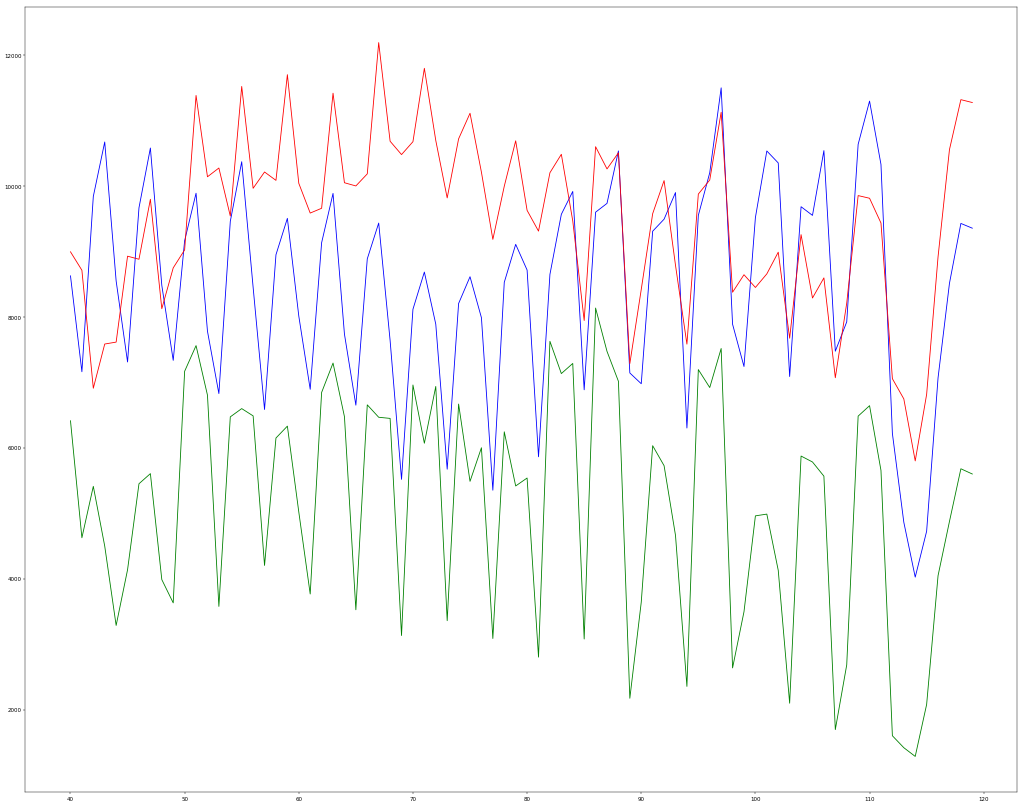

In [20]:
# Plot showing where local minimums are (these are the indexes we are
# searching for). Roughly every 150 indexes there should occur next minimum.
xaxis = list(range(len(dtw_x_data)))[40:120]
fig3 = plt.figure(figsize=(32, 26), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(dtw_x_data[40:120]), color="blue", label="data")
#
# xaxis = list(range(len(dtw_y_data)))
# fig4 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(dtw_y_data[40:120]), color="red", label="data")

# xaxis = list(range(len(dtw_z_data)))
# fig5 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(dtw_z_data[40:120]), color="green", label="data")



In [23]:
minima_indexes = []
maxima_indexes = []
print(len(dtw_x_data))
step = 5
look_forward = 10
# look further and leave only unique values
# step should be 8, or even 10
print(dtw_x_data)
for it in range(0, len(dtw_x_data), step):
    val = min(dtw_x_data[it:it+step])
    val_max = max(dtw_x_data[it:it+step])
    minima_indexes.append(dtw_x_data.index(val))
    maxima_indexes.append(dtw_x_data.index(val_max))

# data = zestaw danych trenujących (np. 10 ruchów w przód wyciągniętych za pomocą DTW)
# target = ruchy z data podpisane który jest który np. data[0] będzie odpowiadać "ruch w przód" w target
print(minima_indexes)
minima_indexes = minima_indexes[8:-3]
X_learn = []
fit = []
for it in minima_indexes:
    start = it*7
    stop = start+150
    X_learn.append([
        np.std(x_normal[start:stop]), mean(x_normal[start:stop]),
        median(x_normal[start:stop]),
        max(x_normal[start:stop]), min(x_normal[start:stop])
    ])
    fit.append('Forward')

for it in maxima_indexes:
    start = it*7
    stop = start+150
    X_learn.append([
        np.std(x_normal[start:stop]), mean(x_normal[start:stop]),
        median(x_normal[start:stop]),
        max(x_normal[start:stop]), min(x_normal[start:stop])
    ])
    fit.append('Wrong')


from sklearn import tree
clf = tree.DecisionTreeClassifier()
original = [np.std(x_reference), mean(x_reference), median(x_reference), max(x_reference), min(x_reference)]
clf = clf.fit(X_learn, fit)
clf.predict([[0, 0, 0, 0, 0]])
# print(X_learn)




140
[0, 8, 10, 15, 24, 29, 33, 37, 41, 45, 53, 57, 61, 69, 73, 77, 81, 85, 94, 99, 103, 107, 114, 115, 121, 127, 134, 137]


array(['Wrong'],
      dtype='<U7')